In [4]:
import math as m 
import pandas as pd 
import numpy as np 
from scipy import integrate 
import numpy.testing as npt 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [122]:
class Norm_rv:
    """
    Class to initialize a normal random variable with mean mu and variance sigma^2

    Norm_rv(mean, variance, crit_value=0.0)
    """
    def __init__(self, mean, variance, crit_value=0.0):
        self.mean = float(mean)
        self.sigma = float(m.sqrt(variance))  
        if variance >0 and variance < np.inf:
            self.variance = variance 
        else: 
            raise ValueError('Enter a variance between 0 and infinity')
        self.crit_value = float(crit_value) 
        self.x_range = np.linspace(-4*self.variance, 4*self.variance, 500*self.variance)
        
    def __repr__(self):
        return f"Normal distribution with mean {self.mean}, variance {self.variance}, and critical value {self.crit_value}"
    
    def pdf(self):
        
        """
        this is the probability density function (pdf) of a normal distribution with mean mu and 
        variance sigma^2. To check that it is, in fact, a pdf, the y values must sum to 1. This 
        would theoretically be the integral from -infty to infty but is approximated here with a sum. 
        """
        
        return (1/(self.sigma*m.sqrt(2*m.pi)))*m.e**((-1/2)*((self.x_range-self.mean)/self.sigma)**2)
        npt.assert_equal(1, round(sum(self.pdf_value),2)) 
        
    def plot_pdf(self, cv_probability=False): 
        
        """
        this function takes a given normal random variable, uses the pdf that was previously calculated,
        and plots it.
        """
        
        plt.title(self.__repr__())
        plt.plot(self.x_range, self.pdf(),linestyle='dashed', color='blue',linewidth=3)
        if cv_probability==False:
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.mean,
                          where=(self.x_range<self.mean), color='navy', alpha=0.3)
        else: 
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.crit_value,
                          where=(self.x_range<self.crit_value), color='navy', alpha=0.3)
        plt.tight_layout() 
        plt.show() 
        
    def probability_calc(self):
        f = lambda x: (1/(self.sigma*m.sqrt(2*m.pi)))*m.e**((-1/2)*((x-self.mean)/self.sigma)**2)
        self.probability, self.error_est = integrate.quad(f,-np.inf,self.crit_value)
        return f"P(X<crit_val) is {round(self.probability,5)} with an error estimate of {round(self.error_est,5)}"

In [139]:
class ChiSq_rv:
    """Class for a Chi-squared random variable with k degrees of freedom 
        
        ChiSq_rv(deg_freedom, crit_value=0.0)
        
        As degrees of freedom increases to infinity, the Chi-squared distribution approximates a normal 
        distribution. You may notice that with >171 degrees of freedom, the math.gamma function returns a 
        range error as this is a very large number and exceeds the Python-allowed data type limit."""
    def __init__(self, df, crit_value=0.0):
        if df > 0:
            self.df = df 
        else: 
            raise ValueError('Degrees of freedom must be > 0')
        self.crit_value = float(crit_value) 
        self.x_range = np.linspace(0, 5*self.df, 2000)
        
    def __repr__(self):
        return f"Chi-squared distribution with {self.df} degrees of freedom and critical value {self.crit_value}"
        
    def pdf(self):
        
        """
        this is the probability density function (pdf) of a chi squared distribution with k degrees of freedom.
        To check that it is, in fact, a pdf, the y values must integrate to 1.
        """
        
        #TODO: add integration rather than sum approximation
        return (1/(m.gamma(self.df/2)*2**(self.df/2)))*self.x_range**((self.df/2)-1)*m.e**(-self.x_range/2)
        npt.assert_equal(1, round(sum(self.pdf),2)) 
    
    def plot_pdf(self, cv_probability=False): 
        
        """
        this function takes a given Chi-squared random variable, uses the pdf that was previously calculated,
        and plots it.
        """
        
        plt.title(self.__repr__())
        plt.plot(self.x_range, self.pdf(),linestyle='dashed', color='red',linewidth=3)
        if cv_probability==False:
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.df,
                          where=(self.x_range>self.df), color='red', alpha=0.3)
        else: 
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.crit_value,
                          where=(self.x_range>self.crit_value), color='red', alpha=0.3)
        plt.tight_layout() 
        plt.show() 
        
    
    def probability_calc(self):
        f = lambda x: (1/(m.gamma(self.df/2)*2**(self.df/2)))*x**((self.df/2)-1)*m.e**(-x/2)
        self.probability, self.error_est = integrate.quad(f,self.crit_value,np.inf)
        return f"P(X>crit_val) is {round(self.probability,5)} with an error estimate of {round(self.error_est,5)}"

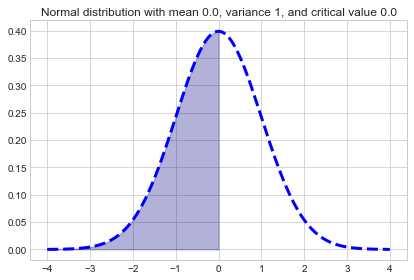

'P(X<crit_val) is 0.5 with an error estimate of 0.0'

In [48]:
#a standard normal r.v. (E(x)=0, Var(x)=1)
a = Norm_rv(0,1)
a.plot_pdf() 
a.probability_calc()

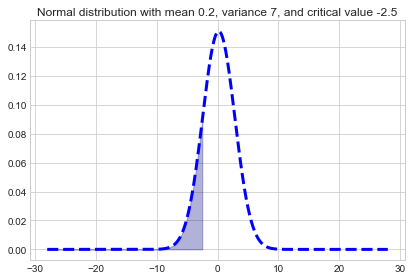

'P(X<crit_val) is 0.15374 with an error estimate of 0.0'

In [49]:
# mean = 0, variance = 7, and a critical value of -2.5
b = Norm_rv(.2,7,-2.5) 
b.plot_pdf(cv_probability=True)
b.probability_calc()

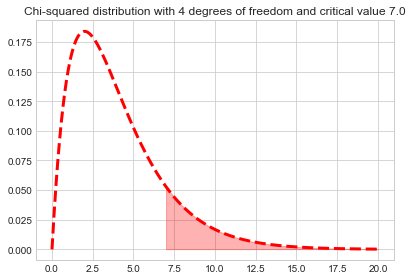

'P(X>crit_val) is 0.13589 with an error estimate of 0.0'

In [132]:
q = ChiSq_rv(4,crit_value=7)
q.plot_pdf(cv_probability=True)
q.probability_calc()

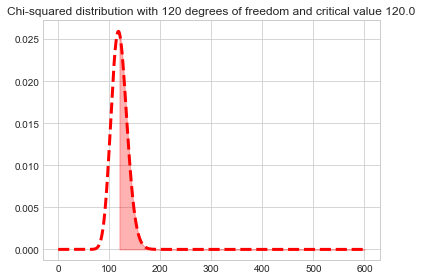

'P(X>crit_val) is 0.48283 with an error estimate of 0.0'

In [105]:

z = ChiSq_rv(120,crit_value=120)
z.plot_pdf(cv_probability=True)
z.probability_calc()